In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv("/Users/erikagromule/Desktop/Historical_data_public_sector.csv", delimiter=";")

In [75]:
print(data.dtypes)

No.                                              int64
Gender                                          object
Age                                            float64
Secundary education                             object
Graduation                                     float64
First education                                 object
Specialization of first education               object
Second education                                object
Specialization of second education              object
Third education                                 object
Specialization of third education               object
Total work experience                          float64
Experience in public administration             object
Experience in a municipal institution           object
Experience in the private sector                object
Experience in an international organization     object
Experience relevant to the job role             object
Native language                                 object
Ministry  

In [76]:
#missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   No.                                          1335 non-null   int64  
 1   Gender                                       1331 non-null   object 
 2   Age                                          796 non-null    float64
 3   Secundary education                          176 non-null    object 
 4   Graduation                                   173 non-null    float64
 5   First education                              1287 non-null   object 
 6   Specialization of first education            1220 non-null   object 
 7   Second education                             619 non-null    object 
 8   Specialization of second education           614 non-null    object 
 9   Third education                              100 non-null    object 
 10  

In [77]:
data.describe=round(data.describe(), 2)
data.describe

,No.,Age,Graduation,Total work experience,Year of publication
count,1335.00,796.00,173.00,1310.00,1335.00
mean,668.00,1982.44,2003.16,2001.28,2023.40
std,385.53,46.52,10.46,111.19,0.49
min,1.00,1075.00,1972.00,0.00,2023.00
25%,334.50,1978.00,1996.00,2001.00,2023.00
50%,668.00,1986.00,2003.00,2007.00,2023.00
75%,1001.50,1993.00,2012.00,2015.00,2024.00
max,1335.00,2010.00,2022.00,2026.00,2024.00


In [78]:
data = data.replace(1086, 1986)

In [79]:
data = data.replace(1075, 1975)

In [80]:
# Assuming your DataFrame is named data
# Convert "v" to "V" for capitalization consistency
data['Gender'] = data['Gender'].str.strip().str.upper().replace('V', 'V')

# Replace "S" with "V"
data['Gender'] = data['Gender'].str.strip().str.upper().replace('S', 'S')

# Check the updated counts to verify the changes
print(data['Gender'].value_counts())

Gender
S    984
V    347
Name: count, dtype: int64


In [81]:
# Convert 'Decision' column values to lowercase and remove leading/trailing whitespace
data['Decision'] = data['Decision'].str.lower().str.strip()

# Map similar categories to a single category
mapping = {
    'noraidīts': 'noraidīts',
    'izvēlēts': 'izvēlēts',
    'atsaucis': 'izvēlēts',  # Map 'atsaucis' to 'izvēlēts'
}

data['Decision'] = data['Decision'].map(mapping).fillna(data['Decision'])  # Fill NaN values with original values

# Check unique values in the 'Decision' column to verify the mapping
print(data['Decision'].unique())

['noraidīts' 'izvēlēts']


In [82]:
data.describe=round(data.describe(), 2)
data.describe

,No.,Age,Graduation,Total work experience,Year of publication
count,1335.00,796.00,173.00,1310.00,1335.00
mean,669.35,1984.70,2003.16,2001.28,2023.40
std,388.53,10.62,10.46,111.19,0.49
min,1.00,1941.00,1972.00,0.00,2023.00
25%,334.50,1978.00,1996.00,2001.00,2023.00
50%,668.00,1986.00,2003.00,2007.00,2023.00
75%,1001.50,1993.00,2012.00,2015.00,2024.00
max,1986.00,2010.00,2022.00,2026.00,2024.00


In [83]:
# Check the column names in the DataFrame
print(data.columns)

# Drop the column 'No' from the DataFrame if it exists
if 'No' in data.columns:
    data.drop('No', axis=1, inplace=True)
    rounded_data_describe = round(data.describe(), 2)
    print(rounded_data_describe)
else:
    print("Column 'No' does not exist in the DataFrame.")

Index(['No.', 'Gender', 'Age', 'Secundary education', 'Graduation',
       'First education', 'Specialization of first education',
       'Second education', 'Specialization of second education',
       'Third education', 'Specialization of third education',
       'Total work experience', 'Experience in public administration',
       'Experience in a municipal institution',
       'Experience in the private sector',
       'Experience in an international organization',
       'Experience relevant to the job role', 'Native language', 'Ministry',
       'The industry', 'Position group', 'Position', 'Decision',
       'Year of publication', 'Duties of the position', 'Job requirements',
       'Institutions'],
      dtype='object')
Column 'No' does not exist in the DataFrame.


In [84]:
# Drop the 'No' column from the DataFrame
data.drop('No.', axis=1, inplace=True)

#### Model training

In [182]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Select features and target variable
X = data.drop('Decision', axis=1)  # Drop the target column from features
y = data['Decision']  # Target variable

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Handle missing values by filling with column mean
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Display the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy:  0.7865168539325843
Classification Report:
              precision    recall  f1-score   support

    izvēlēts       0.56      0.23      0.33        60
   noraidīts       0.81      0.95      0.87       207

    accuracy                           0.79       267
   macro avg       0.68      0.59      0.60       267
weighted avg       0.75      0.79      0.75       267



In [183]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 14  46]
 [ 11 196]]


In [184]:
# Get number of observations
num_observations = data.shape[0]

# Get class distribution in the original dataset
class_distribution_original = data['Decision'].value_counts()

# Get class distribution in the training set
class_distribution_train = y_train.value_counts()
print(f"Number of Observations: {num_observations}")
print("Class Distribution in Original Dataset:")
print(class_distribution_original)
print("Class Distribution in Training Set:")
print(class_distribution_train)

Number of Observations: 1335
Class Distribution in Original Dataset:
Decision
noraidīts    1048
izvēlēts      287
Name: count, dtype: int64
Class Distribution in Training Set:
Decision
noraidīts    841
izvēlēts     227
Name: count, dtype: int64


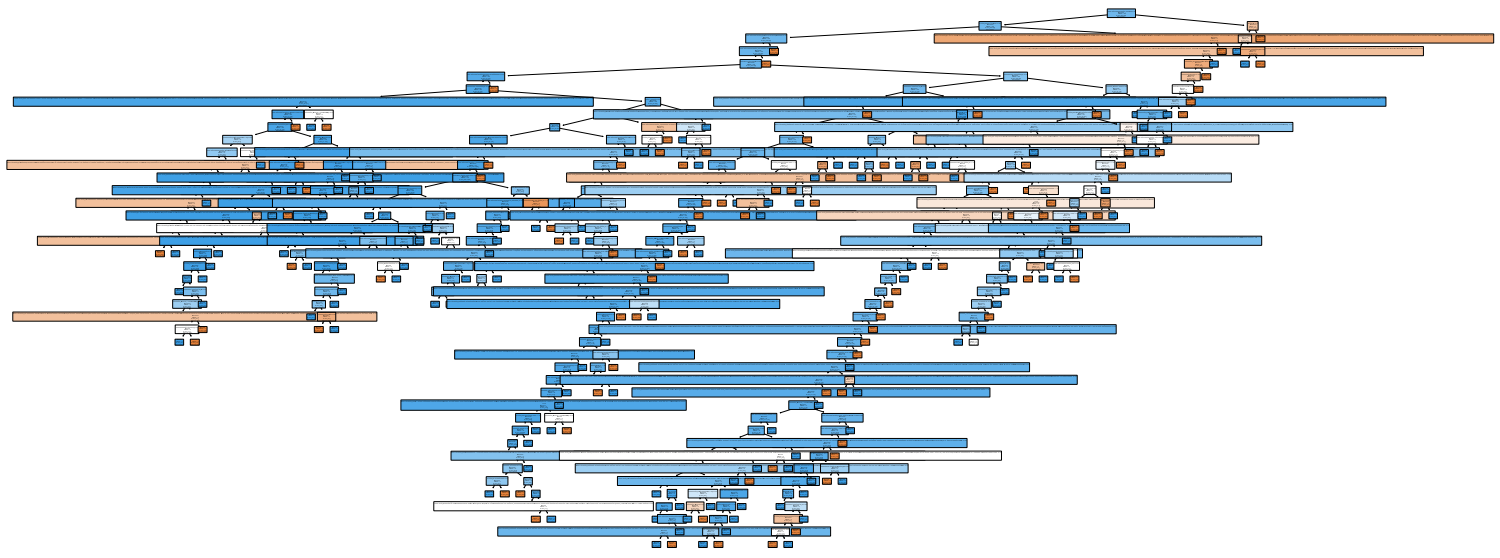

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

n = 0
# Get a specific tree from the Random Forest
individual_tree = rf_classifier.estimators_[n]

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(individual_tree, filled=True, feature_names=X.columns, class_names=['noraidīts', 'izvēlēts'], rounded=True)
plt.show()

In [186]:
# Get the number of nodes and leaves in the Random Forest
n_nodes = rf_classifier.estimators_[0].tree_.node_count  # Assuming all trees have the same structure
n_leaves = rf_classifier.estimators_[0].get_n_leaves()  # Assuming all trees have the same structure

print("Number of nodes in the Random Forest:", n_nodes)
print("Number of leaves in the Random Forest:", n_leaves)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
print("Feature importances:", feature_importances)

Number of nodes in the Random Forest: 569
Number of leaves in the Random Forest: 285
Feature importances: [0.05562015 0.00839458 0.04532974 ... 0.00092615 0.00135274 0.00116315]


In [89]:
# Get feature importances from the trained RF Classifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importances_df)

Feature Importances:
                                                Feature    Importance
0                                                   Age  5.562015e-02
2                                 Total work experience  4.532974e-02
923            Experience in a municipal institution_Nē  1.222234e-02
961               Experience relevant to the job role_3  1.178027e-02
914              Experience in public administration_Jā  1.146523e-02
918              Experience in public administration_Nē  1.085633e-02
4                                              Gender_V  1.070440e-02
29     First education_Bakalaurs (profesionālais grāds)  8.976913e-03
927                 Experience in the private sector_Jā  8.533387e-03
1                                            Graduation  8.394583e-03
950               Experience relevant to the job role_2  8.114802e-03
929                 Experience in the private sector_Nē  7.924851e-03
24                            First education_Bakalaurs  7.655590e-03

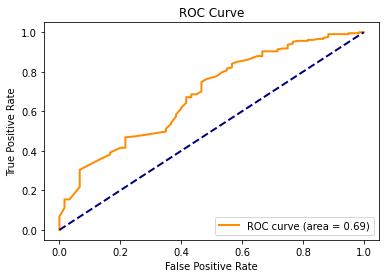

AUC Score: 0.6860708534621579


In [187]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Map categorical labels to binary: 'izvēlēts' to 0, 'noraidīts' to 1
y_test_binary = np.where(y_test == 'izvēlēts', 0, 1)

# Assuming 'rf_classifier' is the Random Forest model you have trained
# Get predicted probabilities for the positive class
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

In [90]:
# Get the feature importance for model training
feature_importance = rf_classifier.feature_importances_

# Features used for model training
features_used = X.columns[feature_importance > 0]

print("\nFeatures Used for Model Training:")
print(features_used)


Features Used for Model Training:
Index(['Age', 'Graduation', 'Total work experience', 'Year of publication',
       'Gender_V', 'Secundary education_2020', 'Secundary education_Koledža',
       'Secundary education_Profesionālā vidējā',
       'Secundary education_Profesionālā vidējā izglītība',
       'Secundary education_Profesionālā vidējā izglītība ',
       ...
       'Institutions_Rural Support Service',
       'Institutions_State Employment Agency',
       'Institutions_State Forest Service', 'Institutions_State Land Service',
       'Institutions_State Probation Service',
       'Institutions_State Regional Development Agency',
       'Institutions_State Revenue Service',
       'Institutions_State Social Insurance Agency',
       'Institutions_State Technical Supervision Agency',
       'Institutions_State Treasury'],
      dtype='object', length=1275)


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.76779026 0.74531835 0.52059925 0.62921348 0.78277154]
Mean CV Score: 0.6891385767790263


#### Modelling to drop Age

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select features (excluding 'Age') and target variable
X = data.drop(['Decision', 'Age'], axis=1)  # Drop 'Age' along with the target column from features
y = data['Decision']  # Target variable

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(X.mean())

# Split the data into training and testing sets (X and y represent your features and target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy:  0.7790262172284644
Classification Report:
              precision    recall  f1-score   support

    izvēlēts       0.53      0.17      0.25        60
   noraidīts       0.80      0.96      0.87       207

    accuracy                           0.78       267
   macro avg       0.66      0.56      0.56       267
weighted avg       0.74      0.78      0.73       267



In [96]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 10  50]
 [  9 198]]


#### Modeling drop the Age and Gender

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select features (excluding 'Age' and 'Gender') and target variable
X = data.drop(['Decision', 'Age', 'Gender'], axis=1)  # Drop 'Age'  and 'Gender' along with the target column from features
y = data['Decision']  # Target variable

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(X.mean())

# Split the data into training and testing sets (X and y represent your features and target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy:  0.7752808988764045
Classification Report:
              precision    recall  f1-score   support

    izvēlēts       0.50      0.18      0.27        60
   noraidīts       0.80      0.95      0.87       207

    accuracy                           0.78       267
   macro avg       0.65      0.57      0.57       267
weighted avg       0.73      0.78      0.73       267



#### Modeling drop "Gender"

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select features (excluding 'Gender') and target variable
X = data.drop(['Decision', 'Gender'], axis=1)  # Drop 'Gender' along with the target column from features
y = data['Decision']  # Target variable

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(X.mean())

# Split the data into training and testing sets (X and y represent your features and target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with default parameters
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy:  0.7827715355805244
Classification Report:
              precision    recall  f1-score   support

    izvēlēts       0.56      0.17      0.26        60
   noraidīts       0.80      0.96      0.87       207

    accuracy                           0.78       267
   macro avg       0.68      0.56      0.56       267
weighted avg       0.74      0.78      0.73       267



In [180]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 10  50]
 [  8 199]]


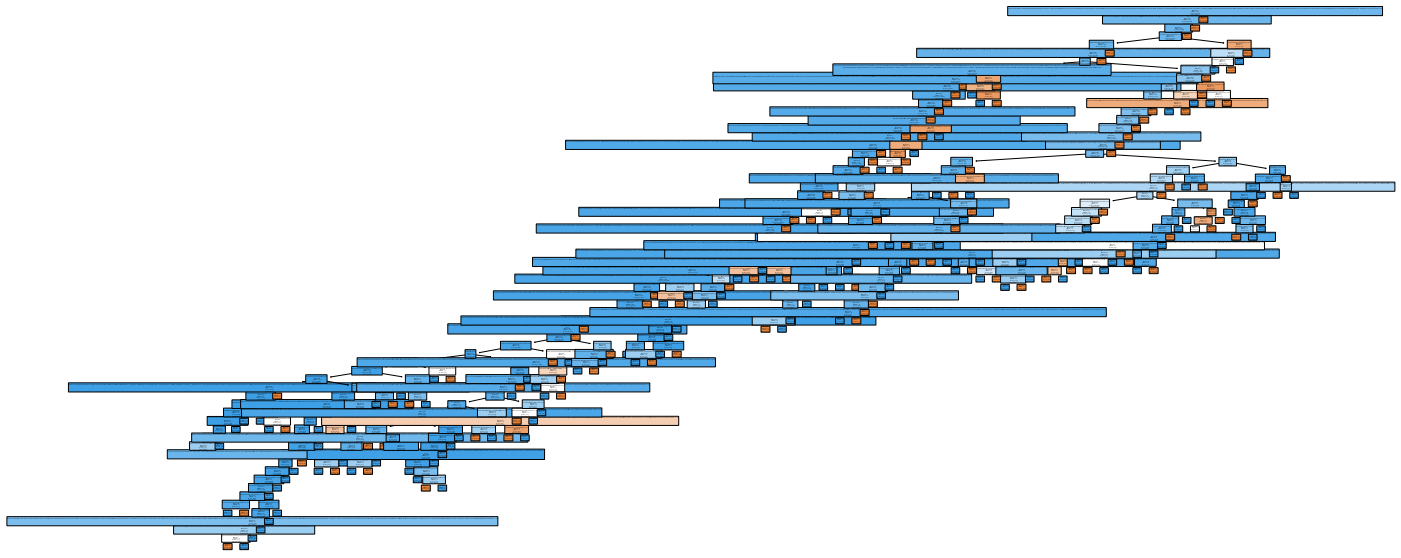

In [181]:
from sklearn import tree
import matplotlib.pyplot as plt

# Get one of the decision trees from the Random Forest
tree_to_visualize = rf_classifier.estimators_[0]  # Change the index to visualize a different tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_to_visualize, filled=True, feature_names=X.columns, class_names=['noraidīts', 'izvēlēts'], 
               rounded=True)
plt.show()

In [178]:
# Get the number of nodes and leaves in the Random Forest
n_nodes = rf_classifier.estimators_[0].tree_.node_count  # Assuming all trees have the same structure
n_leaves = rf_classifier.estimators_[0].get_n_leaves()  # Assuming all trees have the same structure

print("Number of nodes in the Random Forest:", n_nodes)
print("Number of leaves in the Random Forest:", n_leaves)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
print("Feature importances:", feature_importances)

Number of nodes in the Random Forest: 505
Number of leaves in the Random Forest: 253
Feature importances: [0.05491687 0.00805962 0.04748964 ... 0.00128788 0.00192971 0.00156915]


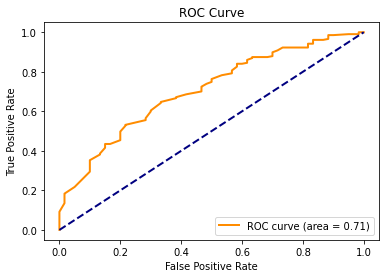

AUC Score: 0.7052737520128824


In [167]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Map categorical labels to binary: 'izvēlēts' to 0, 'noraidīts' to 1
y_test_binary = np.where(y_test == 'izvēlēts', 0, 1)

# Assuming 'rf_classifier' is the Random Forest model you have trained
# Get predicted probabilities for the positive class
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

In [190]:
# Define age groups and corresponding labels
age_groups = ['18-20', '21-30', '31-40', '41-50', '51-60', '61+']
group_labels = np.random.choice(age_groups, size=100)

# Assuming you have predictions for RF models for each data point
prediction_RF = np.random.randint(0, 2, size=100)

# Define predictions for different age groups for RF models
group_predictions_RF = {}
for group in age_groups:
    group_predictions_RF[group] = prediction_RF[group_labels == group]

for group in age_groups:
    print(f"Age Group: {group}")
    print(f"Mean Prediction RF: {np.mean(group_predictions_RF[group])}")
    print("\n")

Age Group: 18-20
Mean Prediction RF: 0.5333333333333333


Age Group: 21-30
Mean Prediction RF: 0.5


Age Group: 31-40
Mean Prediction RF: 0.47058823529411764


Age Group: 41-50
Mean Prediction RF: 0.5625


Age Group: 51-60
Mean Prediction RF: 0.45454545454545453


Age Group: 61+
Mean Prediction RF: 0.6521739130434783




In [168]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.76779026 0.74906367 0.46441948 0.6329588  0.77902622]
Mean CV Score: 0.6786516853932584


In [169]:
# Get feature importances from the trained RF Classifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importances_df)

Feature Importances:
                                                Feature    Importance
0                                                   Age  5.491687e-02
2                                 Total work experience  4.748964e-02
922            Experience in a municipal institution_Nē  1.134723e-02
960               Experience relevant to the job role_3  1.116576e-02
913              Experience in public administration_Jā  1.104403e-02
917              Experience in public administration_Nē  1.060500e-02
28     First education_Bakalaurs (profesionālais grāds)  9.990361e-03
928                 Experience in the private sector_Nē  9.525800e-03
23                            First education_Bakalaurs  9.174391e-03
926                 Experience in the private sector_Jā  8.259528e-03
1056                 Position group_Politikas ieviesējs  8.254363e-03
1                                            Graduation  8.059618e-03
949               Experience relevant to the job role_2  7.392618e-03

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

# Initialize Random Forest (RF) classifier
rf_classifier = RandomForestClassifier()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a voting classifier with RF for model averaging
voting_classifier_rf = VotingClassifier(estimators=[('rf', rf_classifier)], voting='soft')

# Train the voting classifier on the data
voting_classifier_rf.fit(X_train, y_train)

# Assess the performance of the voting classifier with RF
accuracy_rf = voting_classifier_rf.score(X_test, y_test)
print("Accuracy of the Voting Classifier with Random Forest:", accuracy_rf)

Accuracy of the Voting Classifier with Random Forest: 0.7902621722846442


In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

# Initialize Decision Tree (DT) and Random Forest (RF) classifiers
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

# Create a stacking classifier with Random Forest as base estimator
stacking_classifier_rf = StackingClassifier(estimators=[('rf', rf_classifier)], final_estimator=dt_classifier)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the stacking classifier with RF as the base estimator
stacking_classifier_rf.fit(X_train, y_train)

# Assess the performance of the stacking classifier with RF
accuracy_stacking_rf = stacking_classifier_rf.score(X_test, y_test)
print("Accuracy of the Stacking Classifier with Random Forest:", accuracy_stacking_rf)

Accuracy of the Stacking Classifier with Random Forest: 0.7790262172284644


In [172]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest Classifier with the best parameters from GridSearchCV
rf_classifier_optimized = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Fit the optimized Random Forest model on the training data
rf_classifier_optimized.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier_optimized.predict(X_test)

# Calculate accuracy score on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy on the test set with optimized Random Forest parameters: {accuracy_rf}")

# Generate and print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy on the test set with optimized Random Forest parameters: 0.7752808988764045
Classification Report:
              precision    recall  f1-score   support

    izvēlēts       0.00      0.00      0.00        60
   noraidīts       0.78      1.00      0.87       207

    accuracy                           0.78       267
   macro avg       0.39      0.50      0.44       267
weighted avg       0.60      0.78      0.68       267



/Users/erikagromule/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/erikagromule/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/erikagromule/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=10; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=5; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=10; total time=   0.4s
[CV] END ma

In [158]:
from sklearn.metrics import classification_report

# Generate classification report for the optimized Random Forest model
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Classification Report for the optimized Random Forest model:")
print(classification_rep_rf)

Classification Report for the optimized Random Forest model:
              precision    recall  f1-score   support

    izvēlēts       0.00      0.00      0.00        60
   noraidīts       0.78      1.00      0.87       207

    accuracy                           0.78       267
   macro avg       0.39      0.50      0.44       267
weighted avg       0.60      0.78      0.68       267



/Users/erikagromule/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/erikagromule/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/erikagromule/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [189]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score

# Instantiate RandomOverSampler to balance the classes
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset to balance the classes
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set with the Random Forest model: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print("AUC Score:", roc_auc)

Accuracy on the test set with the Random Forest model: 0.9119047619047619
[[209  12]
 [ 25 174]]
AUC Score: 0.6860708534621579


In [160]:
from sklearn.metrics import classification_report

# Generate a classification report for the Random Forest model
classification_rep_rf = classification_report(y_test, y_pred)

print("Classification Report for the Random Forest model:")
print(classification_rep_rf)

Classification Report for the Random Forest model:
              precision    recall  f1-score   support

    izvēlēts       0.89      0.95      0.92       221
   noraidīts       0.95      0.87      0.91       199

    accuracy                           0.92       420
   macro avg       0.92      0.91      0.92       420
weighted avg       0.92      0.92      0.92       420



In [111]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [112]:
from imblearn.under_sampling import RandomUnderSampler

# Create the resampling object
undersample = RandomUnderSampler(sampling_strategy='majority')

# Fit and apply the transformation
X_resampled, y_resampled = undersample.fit_resample(X, y)

In [118]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X = data.drop('Decision', axis=1)
y = data['Decision']

# Instantiate RandomOverSampler to balance the classes
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset to balance the classes
X_resampled, y_resampled = oversampler.fit_resample(X, y)